<a href="https://colab.research.google.com/github/ariel07-sw/applied-data-in-econ/blob/main/Lab%203/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wbgapi

In [10]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
country_codes=['PER','UMC','WLD']
indicators={
 'NY.GDP.PCAP.KD':'GDP_Per_Capita_Const',
 'SL.TLF.CACT.ZS': 'Labor_Part_Rate',
 'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
 'SL.TLF.TOTL.IN': 'Labor_Force_Total',
 'NY.GDP.MKTP.KD': 'GDP_Const',
 'FP.CPI.TOTL.ZG': 'Inflation_CPI',
 'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',
 'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',
 'NE.EXP.GNFS.ZS': 'Exports_GDP',
 'NE.IMP.GNFS.ZS': 'Imports_GDP',
 'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',
 'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'
            }

In [11]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('PER', axis=1, level=0).copy()

Fetching data...


In [12]:
df

economy           PER                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
2000         3.757338   12.608647   11.450627   16.768374           19.627985   
2001         1.977099   12.897106   11.717171   16.601380           18.159505   
2002         0.193135   12.487143   11.165026   17.274808           17.968146   
2003         2.259378   13.411521   11.518717   19.014667           17.510289   
2004         3.662473   13.663369   11.256279   22.912234           16.855683   
2005         1.616302   14.104742   11.444512   26.848761           17.283818   
2006         2.002258   15.669988   10.916695   30.536636           19.650602   
2007         1.779986   16.407468   10.455030   31.522117           22.032387   
2008         5.785876   16.512171   10.370862   29.727630           26.178346   
2009         2.936232   14.456527   11.466356   26.442053           19.978678   
2010         1.528321   15.466572   10.525836   27.826164           23.760509   
2011         3.369311   15.968895   10.362351   30.502760           24.200876   
2012         3.611213   16.546687   10.871212   27.449614           24.606056   
2013         2.767897   16.433007   11.500931   24.808299           25.574182   
2014         3.411946   16.720927   12.402090   22.606970           24.666121   
2015         3.398092   14.919651   12.965573   21.287325           24.305114   
2016         3.557177   13.787548   13.163689   22.600314           22.021313   
2017         2.994900   13.174342   13.212275   24.719872           20.711814   
2018         1.509154   14.286371   13.077442   25.192185           21.311175   
2019         2.252122   14.525404   13.244373   24.039087           20.833640   
2020         2.002412   13.221091   15.818103   23.011443           18.191259   
2021         4.271664   15.924340   13.749814   29.235860           22.314840   
2022         8.333706         NaN   13.394956   28.831861           22.366394   
2023         6.455613         NaN   13.564201   27.135306           19.184409   
2024         2.007707         NaN   13.411797   28.537591           19.419702   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      18.769658  8.740938e+10          3286.273085         17.626700   
2001      18.463022  8.794948e+10          3261.664251         16.297863   
2002      17.974373  9.274583e+10          3398.749914         17.268580   
2003      18.609943  9.660871e+10          3502.791657         17.915013   
2004      19.023845  1.013988e+11          3640.602999         20.744072   
2005      20.508556  1.077717e+11          3835.132193         23.624022   
2006      21.248420  1.158858e+11          4091.362686         28.938819   
2007      24.165997  1.257574e+11          4407.791217         29.388507   
2008      28.706137  1.372347e+11          4778.526422         27.199839   
2009      21.669877  1.387385e+11          4801.171537         24.750854   
2010      23.846645  1.502989e+11          5167.392593         27.740028   
2011      25.485521  1.598086e+11          5453.457187         29.218115   
2012      25.170281  1.696204e+11          5740.043463         26.885390   
2013      24.978843  1.795474e+11          6021.461428         25.403638   
2014      24.246151  1.838246e+11          6103.918647         23.026940   
2015      23.875443  1.898030e+11          6231.711503         21.716996   
2016      22.788527  1.973065e+11          6392.254749         21.833100   
2017      22.793678  2.022763e+11          6457.419403         22.638007   
2018      23.439285  2.103054e+11          6593.144375         23.064074   
2019      22.904418  2.150175e+11          6626.260835     

In [13]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

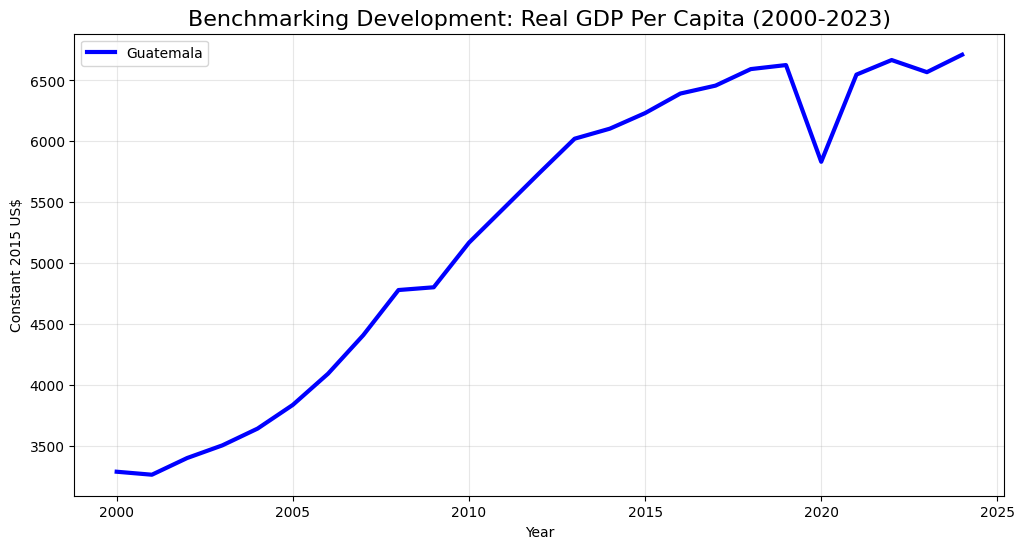

In [15]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

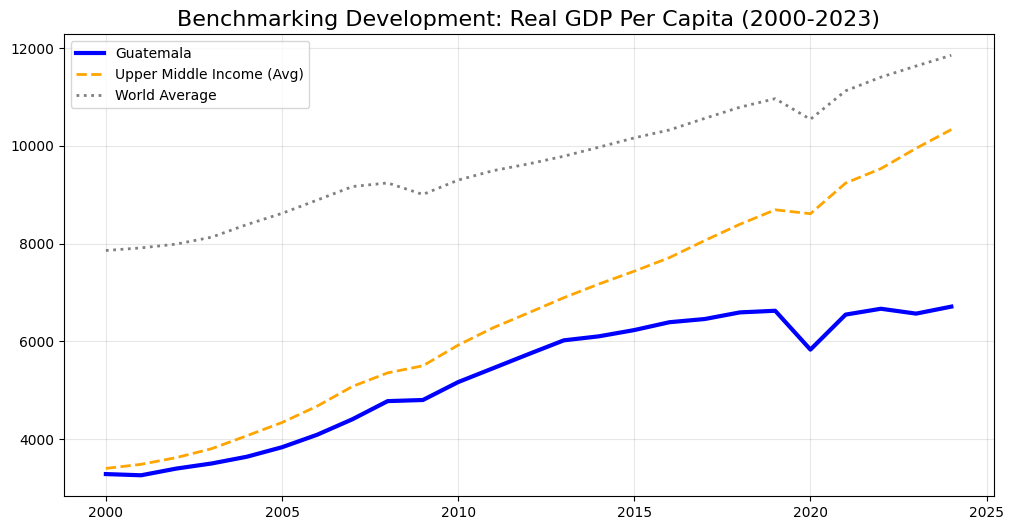

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

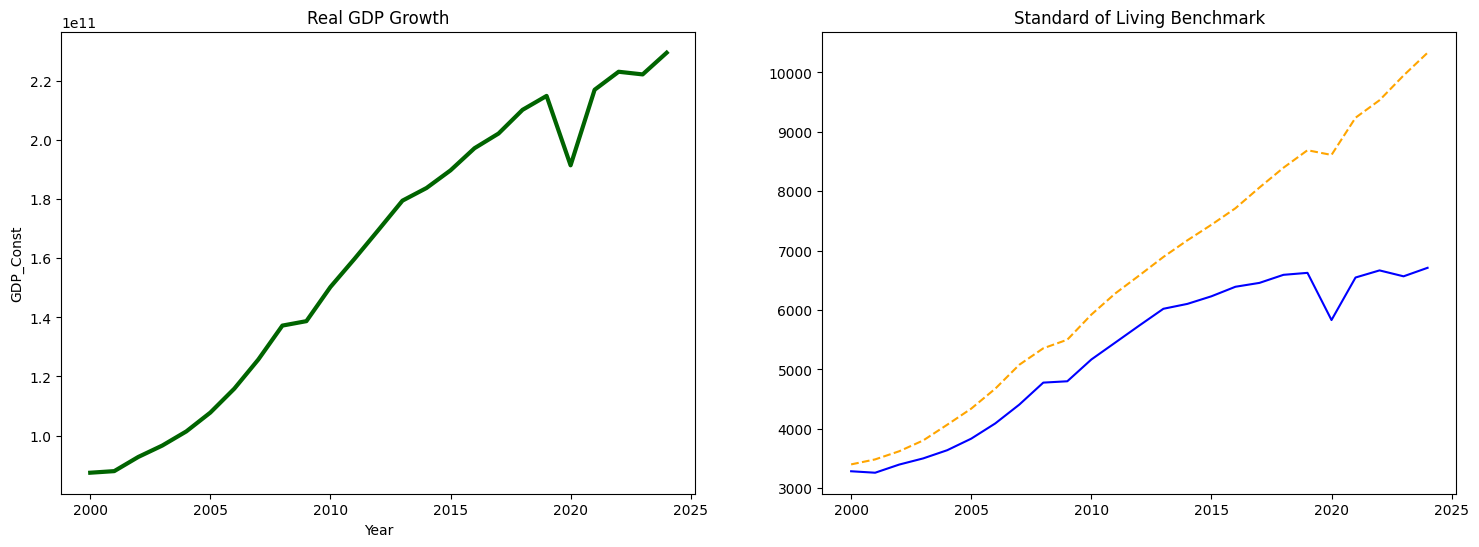

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

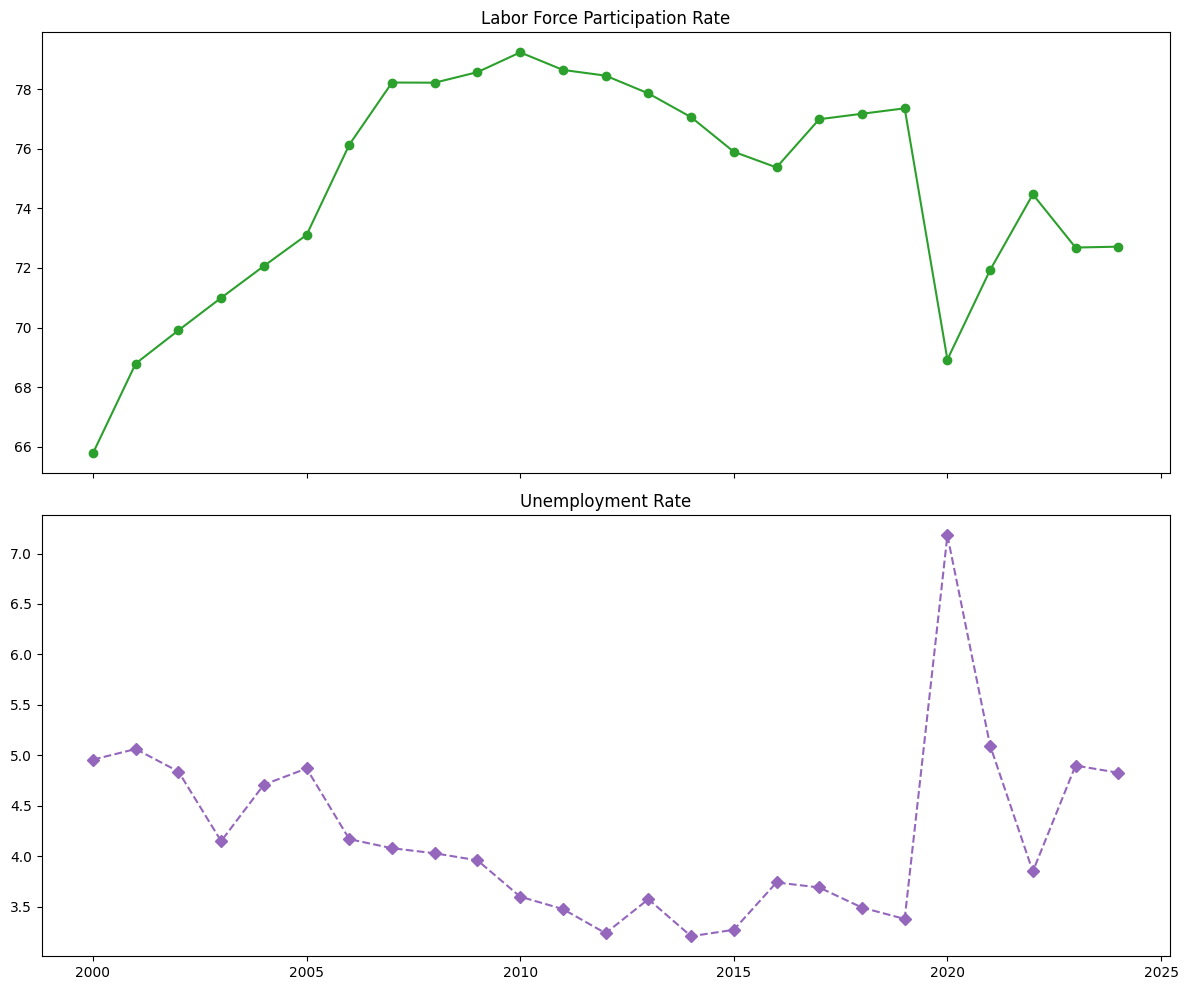

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

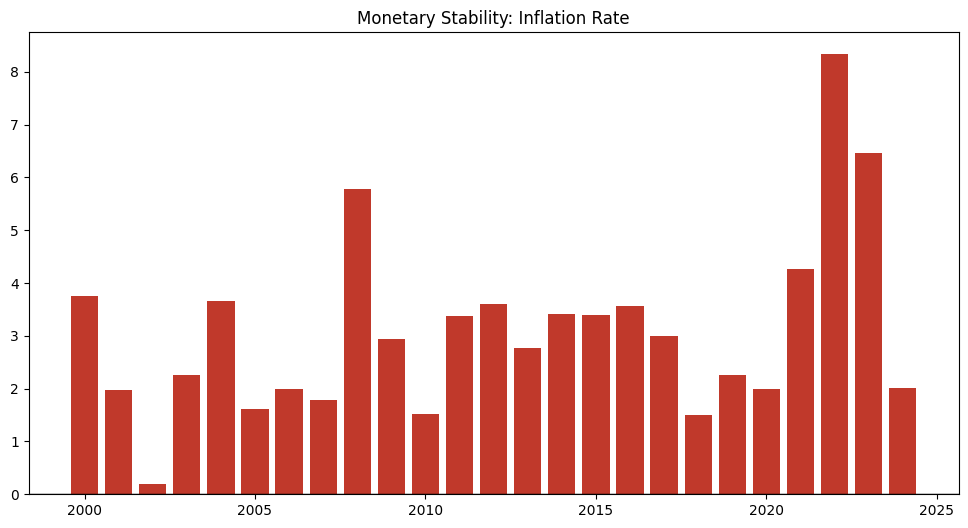

In [19]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

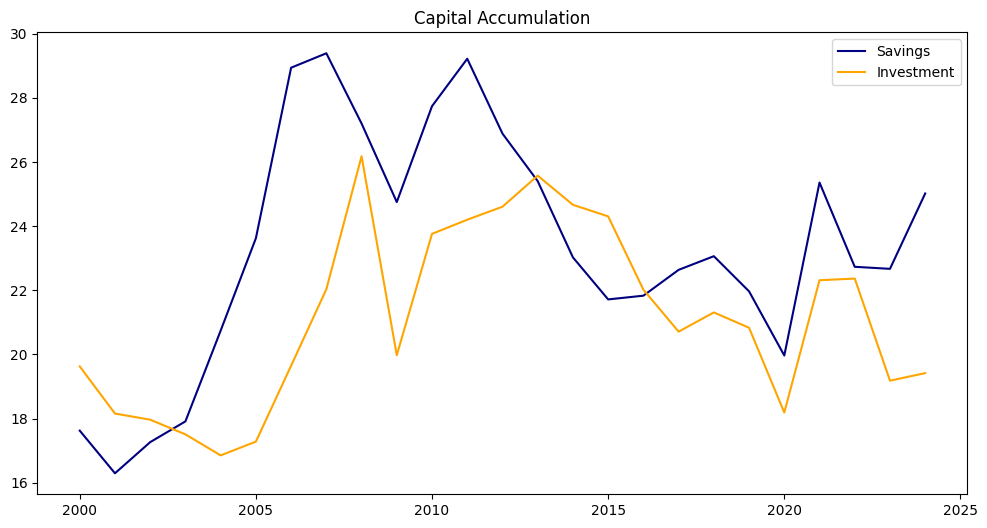

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

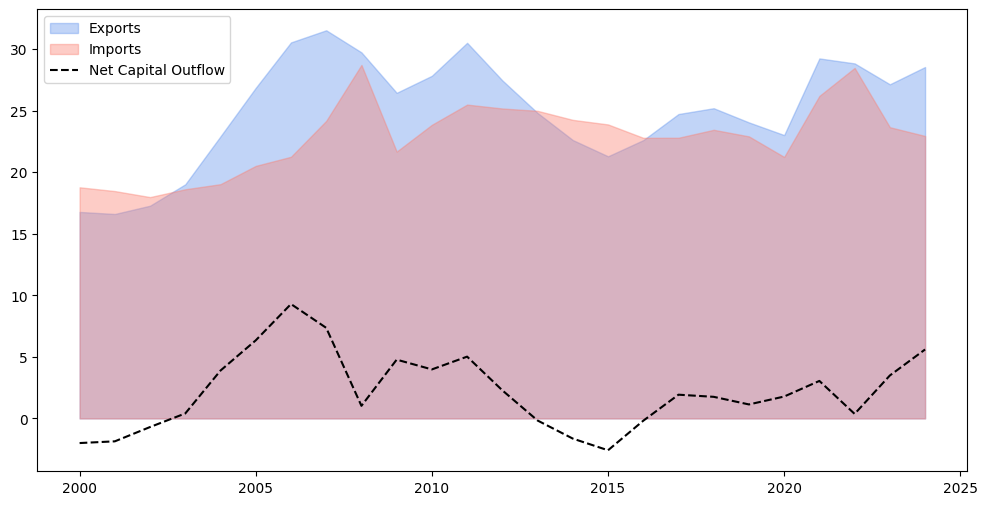

In [21]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

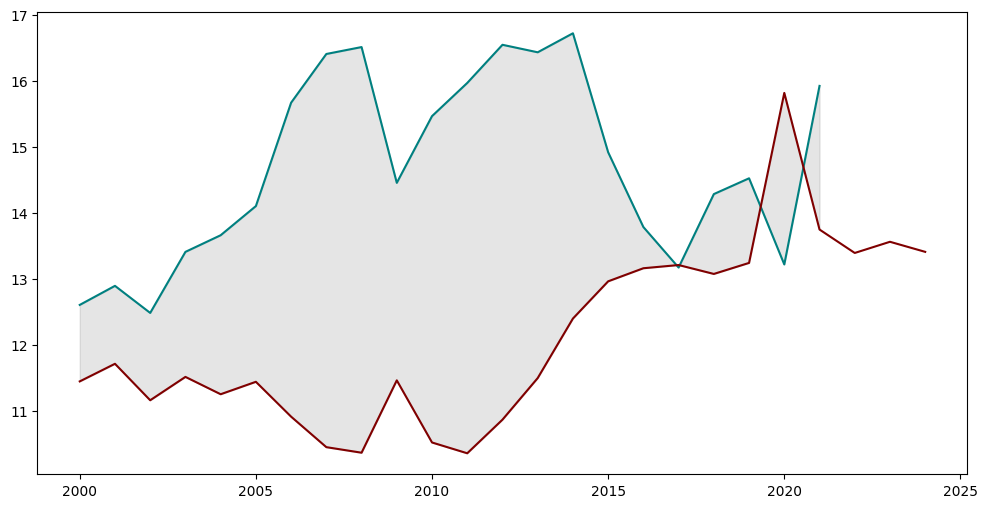

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()